In [11]:
def plot_figures(train_graphs, lr):
    cur_epochs = train_graphs.log_epochs
    plt.figure(figsize=(15,5))

    plt.subplot(2,5,2)
    plt.semilogy(cur_epochs, train_graphs.loss)
    #plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Loss')

    plt.subplot(2,5,3)
    plt.plot(cur_epochs, train_graphs.accuracy)
    #.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Accuracy')

    plt.subplot(2,5,4)
    plt.semilogy(cur_epochs, train_graphs.wn_grad_loss_ratio)
    #plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Grad Loss Ratio')

    plt.subplot(2,5,5)
    plt.plot(cur_epochs, train_graphs.wn_norm_min)
    #.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Min Norm')

    plt.tight_layout()
    plt.show()

def plot_figures_widths(widths, model_params):
    plt.figure(figsize=(15,5))
    for width in widths:
        model_param = model_params[width]
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **model_param)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)

        cur_epochs = train_graphs.log_epochs
        print(cur_epochs)
        plt.subplot(2,5,1)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')

        plt.subplot(2,5,2)
        plt.plot(cur_epochs, train_graphs.accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Accuracy')

        plt.subplot(2,5,3)
        print(train_graphs.wn_grad_loss_ratio)
        plt.semilogy(cur_epochs, train_graphs.wn_grad_loss_ratio)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Grad Loss Ratio')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.wn_grad_loss_ratio_with_g)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Grad Loss Ratio with G')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.wn_norm_min)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Min Norm')

    plt.legend(widths)
    plt.tight_layout()
    plt.show()



In [2]:
import sys
sys.path.append('..')
from main import graphs
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

loss_name = 'MSELoss'

def get_lookup_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, **kwargs):
    results_dir = "results"
    directory = f"{results_dir}/{dataset_name}/{opt_name}/{model_name}/"
    for key, value in kwargs.items():
        directory += f"{key}_{value}/"
    directory += f"lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/"
    return directory

def get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **kwargs):
    #results_dir = "results"
    #directory = f"{results_dir}/{model_name}/{dataset_name}/{opt_name}/lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/epoch_{epochs}/"
    directory = get_lookup_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, **kwargs) + f"epoch_{epochs}/"
    print(directory)
    return directory

In [ ]:
! python main.py --dataset cifar --model weight_norm_torch --loss MSELoss --opt sgd --lr 0.01 --epoch 4000 --analysis loss weight_norm --batch_size 512 --width 512

results/cifar/sgd/weight_norm_torch/width_512/lr_0.01/wd_0/batch_size_512/epoch_4000/
[1, 201, 401]
[]


ValueError: x and y must have same first dimension, but have shapes (3,) and (0,)

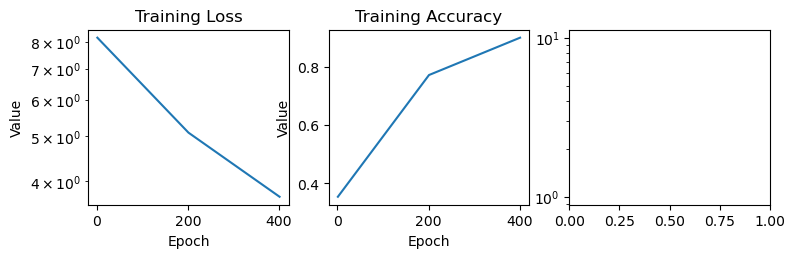

In [12]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 4000 
wn_width = 512
model_name = "weight_norm_torch"
model_params = {}
model_params[512] = {"width": 512}
model_params[1024] = {"width": 1024}
model_params[2048] = {"width": 2048}
"""
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
"""
plot_figures_widths([512], model_params)

results/cifar/sgd/weight_norm_torch/width_512/lr_0.01/wd_0/batch_size_512/epoch_40000/
[1, 201, 401, 601, 801, 1001, 1201]
results/cifar/sgd/weight_norm_torch/width_1024/lr_0.01/wd_0/batch_size_512/epoch_40000/
[1, 201, 401, 601, 801, 1001, 1201]


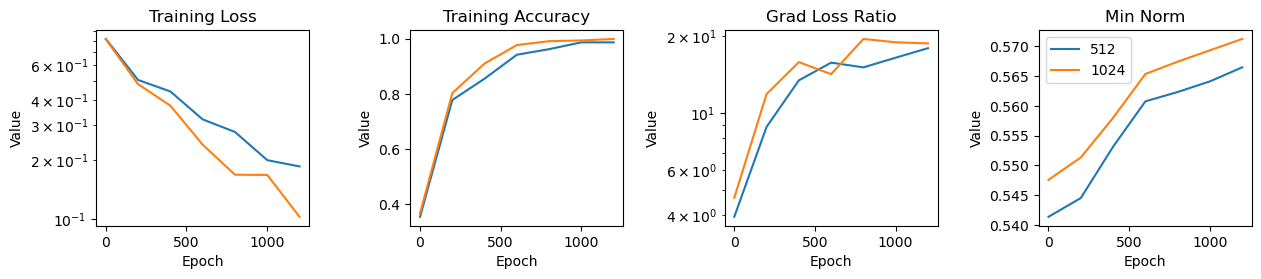

In [11]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 512
model_name = "weight_norm_torch"
model_params = {}
model_params[512] = {"width": 512}
model_params[1024] = {"width": 1024}
"""
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
"""
plot_figures_widths([512, 1024], model_params)

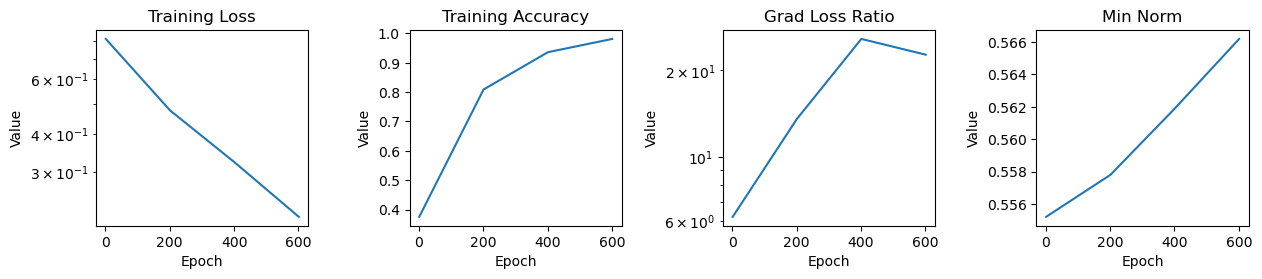

In [44]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 2048
model_name = "weight_norm_torch"
model_params = {"width": wn_width}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)

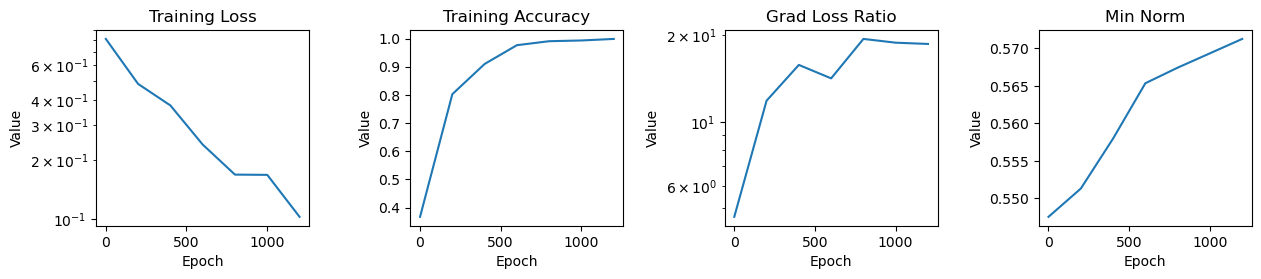

In [43]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 1024
model_name = "weight_norm_torch"
model_params = {"width": wn_width}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)

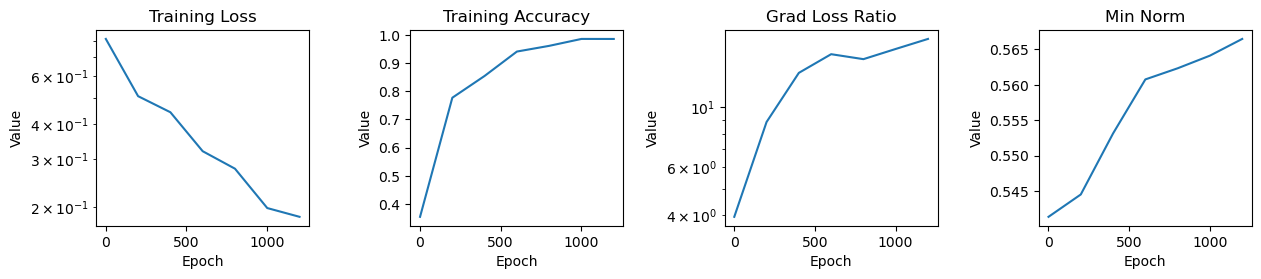

In [41]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 512
model_name = "weight_norm_torch"
model_params = {"width": wn_width}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)

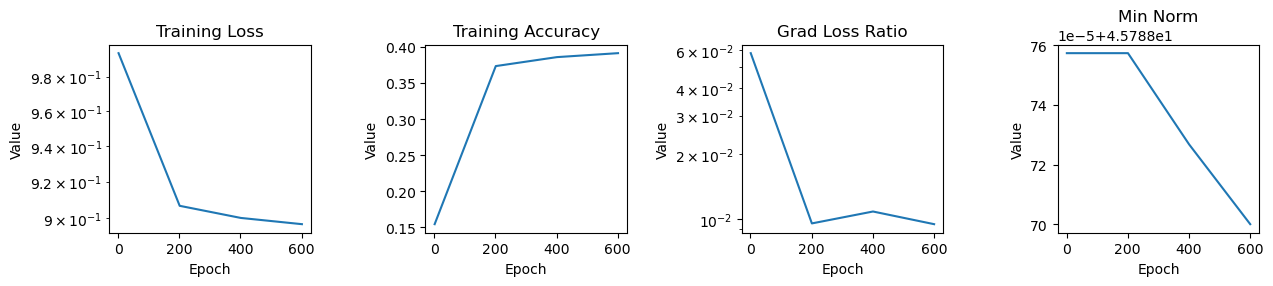

In [36]:
wn_width            = 512 #1024, 2048
wn_init_mode        = "O(1)"#"O(1/sqrt{m})"
wn_basis_var        = 5
wn_scale            = 10

lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
model_name = "weight_norm"
model_params = {"width": wn_width, "init": wn_init_mode, "var": wn_basis_var, "scale": wn_scale}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)
